In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/ibrahimcaglar/Desktop/Real Projects/Stock_optimization/Retail_Dataset2.csv")

In [3]:
df

,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95
...,...,...,...,...,...,...,...,...,...,...,...
169206,993496,Product_1368,Whse_A,Category_019,11/23/2016,1400,0,0,a,1,84
169207,869587,Product_0094,Whse_S,Category_019,11/23/2016,5000,0,0,a,1,80
169208,898180,Product_2074,Whse_A,Category_009,11/23/2016,40,0,0,a,1,81
169209,898179,Product_2074,Whse_A,Category_009,11/23/2016,10,0,0,a,1,83


### What is the start date and end date of this analysis?

In [5]:
# Convert the 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Get the earliest and latest dates in the dataset
start_date = df["Date"].min()
end_date = df["Date"].max()

print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2016-01-03 00:00:00
End Date: 2016-11-23 00:00:00


## 📦 Dataset Overview: Retail Demand Forecasting

This dataset contains historical demand records from a retail company, aiming to support demand forecasting and inventory optimization tasks.

Each row represents the **daily demand** (i.e., number of units ordered) for a specific product, shipped from a specific warehouse, on a given date.

### 📄 Column Descriptions:

| Column Name      | Description |
|------------------|-------------|
| **Product_id**       | Unique identifier for each record (can be ignored for modeling). |
| **Product_Code**     | Coded identifier for the product. |
| **Warehouse**        | Warehouse code from which the product is shipped (e.g., Whse_S, Whse_A). |
| **Product_Category** | Categorical label representing the product's type/category. |
| **Date**             | Date of the order (format: mm/dd/yyyy). |
| **Order_Demand**     | Number of units ordered on that specific date (target variable). |
| **Open**             | Whether the warehouse was open on that day (1 = Open, 0 = Closed). |
| **Promo**            | Whether the product had a promotional offer (1 = Yes, 0 = No). |
| **StateHoliday**     | Indicates if there was a state holiday (`a` = public holiday, `0` = no holiday). |
| **SchoolHoliday**    | Indicates if schools were closed that day (1 = Holiday, 0 = No Holiday). |
| **Petrol_price**     | Petrol price on that day (used to estimate logistics cost impact). |

### Objective
The objective of this project is to analyze historical product demand and generate actionable insights for inventory planning, warehouse optimization, and product prioritization.  
While external factors such as promotions and holidays were initially considered, they were excluded due to limited impact.  
The final output includes demand trend analysis, ABC classification, and product-warehouse demand mapping.

# Outlier Detection

### for Order Demand

In [9]:
df["Order_Demand"].describe()

count    1.692110e+05
mean     5.248118e+03
std      3.116296e+04
min      0.000000e+00
25%      2.000000e+01
50%      3.000000e+02
75%      2.000000e+03
max      2.500000e+06
Name: Order_Demand, dtype: float64

In [10]:
# Z-score calculation for the 'Order Demand' column
z_scores = stats.zscore(df["Order_Demand"])

# Outlier threshold
threshold = 3

# Identify Outliers
outliers = df[np.abs(z_scores) > threshold]
print("Number of outliers:", len(outliers))

Number of outliers: 1567


In [11]:
# Outlier removal
df = df[np.abs(z_scores) <= threshold]

In [12]:
df.shape

(167644, 11)

### for Petrol Price

In [14]:
df["Petrol_price"].describe()

count    167644.000000
mean         87.985761
std           4.909923
min          80.000000
25%          84.000000
50%          88.000000
75%          92.000000
max          96.000000
Name: Petrol_price, dtype: float64

In [15]:
# No outliers

# Exploratory Data Analysis (EDA)

### Detecting null values

In [18]:
df.isnull().sum()

Product_id          0
Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
Open                0
Promo               0
StateHoliday        0
SchoolHoliday       0
Petrol_price        0
dtype: int64

### Warehouse Analysis

In [20]:
df["Warehouse"].nunique()

4

In [21]:
df["Warehouse"].unique()

array(['Whse_S', 'Whse_A', 'Whse_C', 'Whse_J'], dtype=object)

### 🏬 Warehouse Information

The dataset includes records from **4 different warehouses**, which represent the distribution centers used by the company to fulfill product orders.

**List of Warehouses:**
- Whse_S
- Whse_A
- Whse_C
- Whse_J

Each warehouse appears multiple times in the dataset, as the data contains daily product demand entries per warehouse.

### Product Analysis

In [24]:
df["Product_Category"].nunique()

30

In [25]:
df["Product_Category"].unique()

array(['Category_005', 'Category_006', 'Category_030', 'Category_018',
       'Category_028', 'Category_022', 'Category_019', 'Category_001',
       'Category_021', 'Category_032', 'Category_012', 'Category_024',
       'Category_003', 'Category_009', 'Category_007', 'Category_011',
       'Category_017', 'Category_026', 'Category_023', 'Category_015',
       'Category_008', 'Category_013', 'Category_031', 'Category_033',
       'Category_020', 'Category_010', 'Category_027', 'Category_029',
       'Category_016', 'Category_014'], dtype=object)

In [26]:
df["Product_Code"].nunique()

2117

In [27]:
# Get unique product codes for each category
category_product_map = df.groupby("Product_Category")["Product_Code"].unique()

# Convert to dictionary (as lists)
product_lists = {category: list(products) for category, products in category_product_map.items()}

# Create a dataframe from the lists
category_product_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in product_lists.items()]))

# Export to Excel
#category_product_df.to_excel("category_table.xlsx", index=False)

# Display the table in Jupyter Notebook
display(category_product_df)

,Category_001,Category_003,Category_005,Category_006,Category_007,Category_008,Category_009,Category_010,Category_011,Category_012,...,Category_023,Category_024,Category_026,Category_027,Category_028,Category_029,Category_030,Category_031,Category_032,Category_033
0,Product_1751,Product_1726,Product_0033,Product_1825,Product_0229,Product_0119,Product_2143,Product_1777,Product_0658,Product_0439,...,Product_0891,Product_1618,Product_1208,Product_2147,Product_0643,Product_1957,Product_0551,Product_1816,Product_1101,Product_1282
1,Product_0613,Product_1724,Product_0470,Product_1812,Product_0202,Product_0827,Product_2111,Product_1776,Product_0125,Product_0510,...,Product_0890,Product_1646,Product_1659,Product_0647,Product_0982,Product_1960,Product_0556,Product_1815,Product_0588,Product_1362
2,Product_0627,Product_1719,Product_1970,Product_0936,Product_0200,Product_0149,Product_2114,Product_1778,Product_0431,Product_0570,...,Product_0893,Product_1794,Product_1674,NaN,Product_0987,Product_1959,Product_0411,Product_1837,Product_0583,Product_1361
3,Product_1942,Product_1722,Product_0012,Product_1158,Product_0225,Product_1024,Product_2109,Product_1775,Product_0679,Product_0579,...,Product_0901,Product_1807,Product_1710,NaN,Product_0977,Product_1958,Product_0368,Product_1836,Product_1061,Product_1363
4,Product_0620,Product_1718,Product_1581,Product_1156,Product_0228,Product_0828,Product_2138,Product_1779,Product_0671,Product_0578,...,Product_0905,Product_1847,Product_1669,NaN,Product_0997,NaN,Product_1735,Product_1584,Product_1052,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 🧾 Product Category Overview

The dataset includes a total of **30 distinct product categories**, representing the company’s diverse range of offerings across different product types.

Across these 30 categories, the company manages **2,117 unique products**, each identified by a unique product code. These codes allow for consistent tracking and grouping of products over time.

To support deeper analysis, a detailed **category-product mapping table** has been created.  
This table shows **which products belong to which categories**, with each category represented as a column and its associated products listed underneath.

The table has been exported to an Excel file and can be shared with relevant stakeholders for inventory management, category-based planning, or product portfolio analysis.

### Product - Demand Analysis

In [30]:
top_products = df.groupby("Product_Code")["Order_Demand"].sum().sort_values(ascending=False)
display(top_products.head(10))

Product_Code
Product_1359    35525000
Product_1295    20232200
Product_1286    16949500
Product_1287    15188500
Product_1378    14999000
Product_1382    14994800
Product_1294    13507800
Product_1248    13010000
Product_1453    12791100
Product_1274    11796000
Name: Order_Demand, dtype: int64

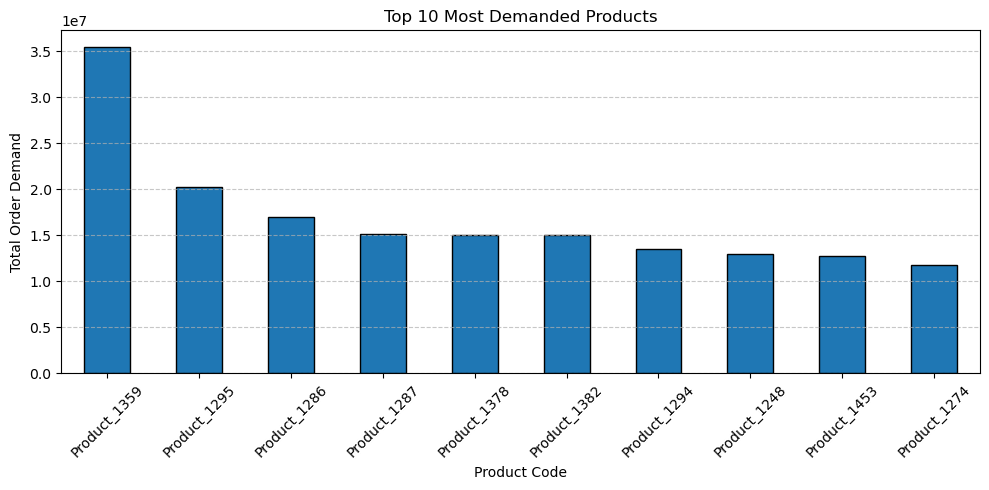

In [31]:
top_products.head(10).plot(kind="bar", figsize=(10,5), edgecolor="black")
plt.title("Top 10 Most Demanded Products")
plt.xlabel("Product Code")
plt.ylabel("Total Order Demand")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
#plt.savefig("most_demanded_products.png", dpi=300, bbox_inches='tight') 
plt.show()

In [32]:
top_10_total = top_products.head(10).sum()
overall_total = top_products.sum()
percentage = top_10_total / overall_total * 100
print(f"Top 10 products account for {percentage:.2f}% of total demand")

Top 10 products account for 30.32% of total demand


### Monthly Demand Trend

In [34]:
df = df.copy()
df["Month"] = df["Date"].dt.to_period("M") # Adding month column 

In [35]:
monthly_demand = df.groupby("Month")["Order_Demand"].sum()
display(monthly_demand)

Month
2016-01    45755119
2016-02    47923041
2016-03    55945260
2016-04    52396864
2016-05    48477393
2016-06    53894711
2016-07    51906836
2016-08    52218772
2016-09    53482796
2016-10    52138957
2016-11    43157433
Freq: M, Name: Order_Demand, dtype: int64

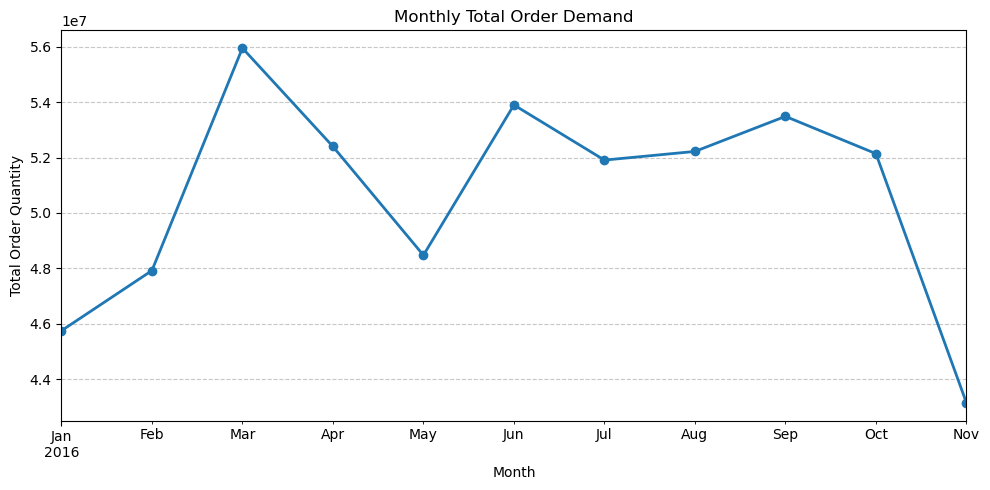

In [36]:
plt.figure(figsize=(10,5))
monthly_demand.plot(kind="line", marker="o", linewidth=2)
plt.title("Monthly Total Order Demand")
plt.xlabel("Month")
plt.ylabel("Total Order Quantity")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
#plt.savefig("monthly_demand.png", dpi=300, bbox_inches='tight') 
plt.show()

### 📈 Monthly Demand Trend Analysis

To understand seasonal patterns and support inventory planning, the total product demand was analyzed on a monthly basis.

The dataset spans from **January to November 2016**, and outliers in the `Order_Demand` column were removed prior to analysis to ensure accurate trend detection.

**Key Observations:**
- 📌 **March** recorded the **highest total demand**, suggesting a peak season or campaign period.
- 📉 A significant **drop occurred in May**, potentially indicating a post-season slowdown or reduced market activity.
- 📊 **June to October** showed relatively **stable demand**, representing a consistent performance period.
- ⚠️ **November** had the lowest demand, likely due to **incomplete data** (only covering up to November 23) and should be interpreted with caution.

This monthly trend provides valuable insight for **seasonal forecasting**, **warehouse planning**, and **supply chain optimization**.

### Promotion - Demand Relationship

Promotions were excluded from the final report due to unclear impact and limited interpretability.

### Warehouse-based Demand Analysis

In [41]:
warehouse_demand = df.groupby("Warehouse")["Order_Demand"].sum().sort_values(ascending=False)
display(warehouse_demand)

Warehouse
Whse_J    441366616
Whse_C     48561519
Whse_S     42537059
Whse_A     24831988
Name: Order_Demand, dtype: int64

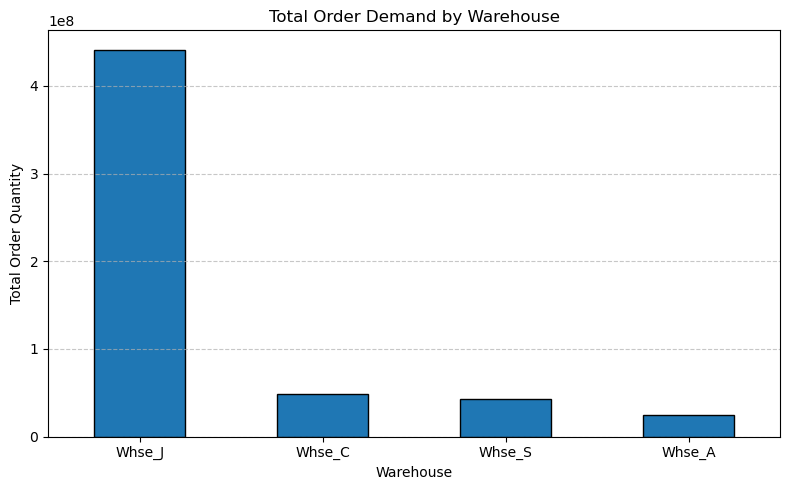

In [42]:
plt.figure(figsize=(8,5))
warehouse_demand.plot(kind="bar", edgecolor="black")
plt.title("Total Order Demand by Warehouse")
plt.xlabel("Warehouse")
plt.ylabel("Total Order Quantity")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig("warehouse_demand.png", dpi=300, bbox_inches='tight') 
plt.show()

In [43]:
warehouse_share = (warehouse_demand / warehouse_demand.sum()) * 100
display(warehouse_share)

Warehouse
Whse_J    79.197712
Whse_C     8.713756
Whse_S     7.632743
Whse_A     4.455789
Name: Order_Demand, dtype: float64

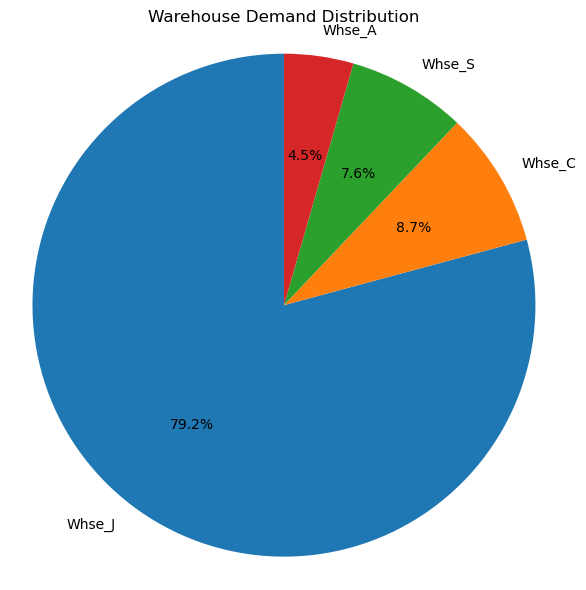

In [44]:
warehouse_share = {
    'Whse_J': 79.197712,
    'Whse_C': 8.713756,
    'Whse_S': 7.632743,
    'Whse_A': 4.455789
}

# Pie chart 
plt.figure(figsize=(6,6))
plt.pie(warehouse_share.values(), labels=warehouse_share.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Warehouse Demand Distribution")
plt.axis('equal')  # Daire şeklinde çizim için
plt.tight_layout()
#plt.savefig("warehouse_demand_pie.png", dpi=300, bbox_inches='tight') 
plt.show()

### 🏬 Warehouse Demand Distribution

An analysis of total order demand by warehouse revealed a significant imbalance:

- **Whse_J** handled approximately **79.2%** of all orders, making it the company's primary distribution hub.
- The remaining three warehouses (Whse_C, Whse_S, Whse_A) together contributed only **20.8%** of total demand.

This centralization may indicate operational efficiency, but also raises concerns about over-reliance on a single facility and potential risk in the event of disruptions.

These findings can support decisions related to **load balancing**, **logistics planning**, and **capacity investment** across warehouses.

### Holiday Impact on Demand

State holiday analysis was excluded from the final report due to limited data coverage and marginal differences in average demand, which made interpretation and business actionability inconclusive.

### Daily Demand Analysis 

In [49]:
avg_daily_demand = df.groupby("Product_Code")["Order_Demand"].sum() / df["Date"].nunique()
avg_daily_demand = avg_daily_demand.sort_values(ascending=False)
avg_daily_demand

Product_Code
Product_1359    125088.028169
Product_1295     71240.140845
Product_1286     59681.338028
Product_1287     53480.633803
Product_1378     52813.380282
                    ...      
Product_0527         0.010563
Product_0465         0.010563
Product_1944         0.010563
Product_1647         0.003521
Product_1698         0.003521
Name: Order_Demand, Length: 2117, dtype: float64

In [50]:
total_demand = avg_daily_demand.sum()
cumulative_share = avg_daily_demand.cumsum() / total_demand

abc_class = cumulative_share.apply(lambda x: "A" if x <= 0.8 else ("B" if x <= 0.95 else "C"))
abc_class

Product_Code
Product_1359    A
Product_1295    A
Product_1286    A
Product_1287    A
Product_1378    A
               ..
Product_0527    C
Product_0465    C
Product_1944    C
Product_1647    C
Product_1698    C
Name: Order_Demand, Length: 2117, dtype: object

In [51]:
#abc_class_df = abc_class.to_frame(name="ABC_Class")
#abc_class_df.to_excel("abc_classification.xlsx")

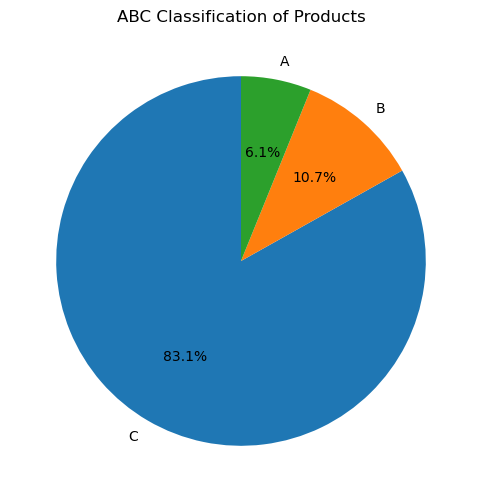

In [52]:
abc_counts = abc_class.value_counts()

abc_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title("ABC Classification of Products")
plt.ylabel("")
#plt.savefig("abc_classification.png", dpi=300, bbox_inches='tight') 
plt.show()

📦 ABC Classification – Inventory Prioritization

Based on average daily demand, all 2,117 products were categorized using the ABC analysis method:

- **A-class (High priority):** Represents ~6% of products, but accounts for ~80% of total demand. These products are critical and should always be in stock.
- **B-class (Medium priority):** Around 10% of products, contributing ~15% of total demand. They should be monitored and stocked efficiently.
- **C-class (Low priority):** Makes up ~83% of products, but contributes less than 5% of demand. These products can be considered for reduced stocking or made-to-order strategies.

This classification helps focus inventory planning on a smaller set of high-impact products, optimizing space, cost, and service levels.

### Monthly Product Demand per Warehouse

In [55]:
pivot = df.pivot_table(
    index=["Product_Code", "Month"],
    columns="Warehouse",
    values="Order_Demand",
    aggfunc="sum"
).fillna(0)

In [56]:
#pivot.to_excel("warehouse_product_monthly_demand.xlsx")

### 📦 Monthly Product Demand per Warehouse

To support inventory placement and warehouse-level stock optimization, a detailed pivot table was created showing monthly order demand per product across all four warehouses.

The table provides:
- Monthly breakdown of demand for each product
- Comparative demand across warehouses (Whse_J, Whse_A, Whse_C, Whse_S)
- Insights for identifying which products are most in demand at which locations

This dataset is crucial for making data-driven decisions regarding:
- Warehouse-specific stock allocation
- Inter-warehouse transfers
- Regionally tailored inventory strategies

The full pivot table has been exported to Excel for further exploration and visual reporting.

### ✅ Final Deliverables & Business Usage

This analysis provides actionable insights and tools to support inventory decisions, warehouse planning, and product prioritization.  
The following deliverables can be used immediately by the company in day-to-day operations:

---

📁 **1. Category Table (Excel)**  
→ Shows which products belong to which product category  
✅ Use case: Quickly identify all products under any specific category for category-based planning, promotions, or reporting.

---

📁 **2. ABC Classification (Excel)**  
→ Categorizes each product into A (critical), B (moderate), or C (low) class based on its demand volume  
✅ Use case:  
- Focus stocking efforts on A-class products  
- Monitor B-class products regularly  
- Consider reducing or removing C-class products to save storage and cost

---

📁 **3. Product–Warehouse–Month Demand Matrix (Excel)**  
→ Provides monthly demand of each product, broken down by warehouse  
✅ Use case:  
- Identify which warehouse needs stock of which product and when  
- Optimize inventory placement  
- Support inter-warehouse transfers based on actual demand  
- Plan warehouse-specific replenishment strategies

---

📊 **4. Top 10 Most Demanded Products (Bar Chart)**  
✅ Use case: Visual reference for the company's best-performing products.  
Focus efforts on production, marketing, and inventory for these items.

---

📊 **5. Monthly Total Demand Trend (Line Chart)**  
✅ Use case: Understand seasonal demand patterns  
Plan production and procurement based on historical peak and low seasons.

---

📊 **6. Total Demand by Warehouse (Bar Chart)**  
✅ Use case: Assess operational load on each warehouse  
Redistribute load if one location is overloaded (e.g., Whse_J handles ~79% of all orders)

---

📌 These insights can directly support:

- Inventory reduction without losing sales  
- More balanced warehouse usage  
- Better planning of high-demand periods  
- Efficient stock prioritization

All files have been exported in Excel and can be easily shared with warehouse managers, supply chain teams, and decision-makers.